___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителя

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [4]:
!pip install apyori

In [5]:
import numpy as np
import pandas as pd
from apyori import apriori

In [105]:
df = pd.read_csv('Groceries.csv', header=None)

print(df.shape)
df.head()

(9835, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(df.values[i,j]) for j in range(df.shape[1]) if pd.notna(df.values[i,j])])
transactions    

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [109]:
association_rules = apriori(transactions, min_support=0.0045, min_confidence=0.2, min_lift=3, max_length=2)


In [110]:
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1] )

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: whipped/sour cream -> baking powder
Support: 0.004575495678698526
Confidence: 0.25862068965517243
Lift: 3.607850330154072
Rule: root vegetables -> beef
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: whipped/sour cream -> berries
Support: 0.009049313675648195
Confidence: 0.27217125382262997
Lift: 3.796885505454703
Rule: bottled beer -> liquor
Support: 0.004677173360447382
Confidence: 0.4220183486238532
Lift: 5.240594013529793
Rule: bottled beer -> red/blush wine
Support: 0.004880528723945094
Confidence: 0.253968253968254
Lift: 3.1537598204264876
Rule: flour -> sugar
Support: 0.00498220640569395
Confidence: 0.28654970760233917
Lift: 8.46311223504206
Rule: root vegetables -> herbs
Support: 0.007015760040671073
Confidence: 0.43124999999999997
Lift: 3.956477378731343
Rule: sliced cheese -> sausage
Support: 0.007015760040671073
Confidence: 0.2863070539419087
Lift: 3.047434930215013


In [55]:
dictt = {}
i = 0
for item in association_results:
    dictt[i] = [item[0], item[1], item[2][0][2], item[2][0][3]]
    i += 1
df1 = pd.DataFrame(dictt, index = ['Pairs of products', 'Support', 'Confidence', 'Lift']).T
df1

,Pairs of products,Support,Confidence,Lift
0,"(whipped/sour cream, baking powder)",0.0045755,0.258621,3.60785
1,"(root vegetables, beef)",0.0173869,0.331395,3.04037
2,"(whipped/sour cream, berries)",0.00904931,0.272171,3.79689
3,"(bottled beer, liquor)",0.00467717,0.422018,5.24059
4,"(bottled beer, red/blush wine)",0.00488053,0.253968,3.15376
5,"(flour, sugar)",0.00498221,0.28655,8.46311
6,"(root vegetables, herbs)",0.00701576,0.43125,3.95648
7,"(sliced cheese, sausage)",0.00701576,0.286307,3.04743


TOP 3 of goods:

In [58]:
array = df.to_numpy().reshape(-1)

sers = pd.Series(array).dropna()

sers.value_counts()[:3]

whole milk          2513
other vegetables    1903
rolls/buns          1809
dtype: int64

TOP 2 pairs of goods:

In [51]:
df.sort_values('Support', ascending=False, inplace=True)
df.head(2)

,Pairs of products,Support,Confidence,Lift
1,"(root vegetables, beef)",0.0173869,0.331395,3.04037
2,"(whipped/sour cream, berries)",0.00904931,0.272171,3.79689


### Conclusions

1. We analyzed sales of good using associative rules model.

2. The Top-3 list includes goods of every day usage such as, milk, vegetables, and rolls.

3. The shop should have enough goods in stocks and might be think of extending range of these goods.

4. The Top-2 pairs of goods is quite interesting: root vegetables and beef might be used for different dishes (for example, borshch), sour cream and berries are good for desserts. The shop should place shelves with these pairs of goods near each other to inclease sales of them.

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('Mall_Customers.csv')

print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


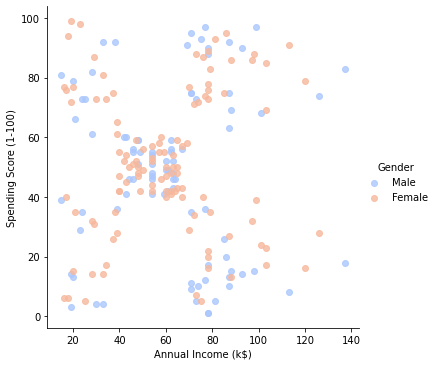

In [75]:
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=df, hue='Gender',
           palette='coolwarm',fit_reg=False)

In [ ]:
# There is a clear separation into clusters (See plot above) in the dependence of Spending score on the Annual income.
# Other pairs of parameters do not show any clear clusters, so we will not consider them.

In [86]:
# We can distinguish 5 clusters. 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [87]:
# We omit the column Gernder, as there is no Gender separation in the plot above
kmeans.fit(df.drop('Gender',axis=1))

KMeans(n_clusters=5)

In [88]:
kmeans.cluster_centers_

array([[ 92.89230769,  44.27692308,  57.87692308,  49.10769231,
          0.        ],
       [ 23.        ,  45.2173913 ,  26.30434783,  20.91304348,
          0.        ],
       [ 35.43243243,  29.94594595,  32.56756757,  68.10810811,
          0.        ],
       [164.        ,  40.80555556,  87.91666667,  17.88888889,
          0.        ],
       [162.        ,  32.69230769,  86.53846154,  82.12820513,
          0.        ]])

In [89]:
kmeans.inertia_

158117.05681300032

In [90]:
kmeans.labels_

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

Text(0, 0.5, 'Inertia')

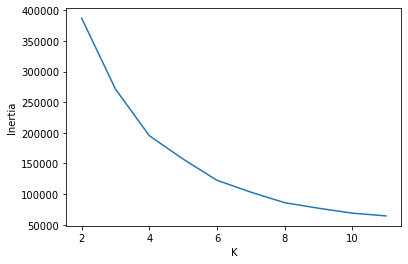

In [91]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df.drop('Gender',axis=1))
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

In [84]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
df['Cluster'] = df['Gender'].apply(converter)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [92]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[65 23 37 36 39]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.49       200
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.33       200
   macro avg       0.20      0.07      0.10       200
weighted avg       1.00      0.33      0.49       200



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


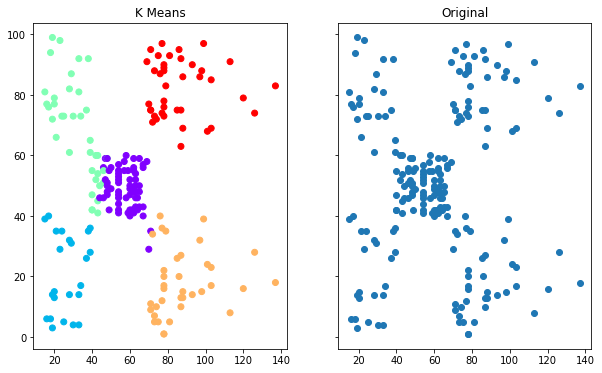

In [98]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],cmap='rainbow')

### Conclusions

1. We analyzed dependence of the Spending score on the Annual income, i.e. how much people spend money vs. how much they earn.

2. Usage of K-mean model enabled us to distingiush 5 groups of customers. This model works quite well, however the part of the "middle" cluster (violet) was added to the green cluster. Let us describe obtained results:

3. Cluster 1 (lite blue). These people have low income and they do not spend much. They would prefere cheap goods and avoid buying expensive ones.

4. Cluster 2 (violet). This is the biggest group of customers. They have middle level of income and the same level of expences. These people will go shopping to the middle-level malls.

5. Cluster 3 (red). People with high income and high spend rate. Earn more-spend more. Target audience for expensive brands.

6. Cluster 4 (orange). People do not spend as much as they earn. This group might be interesting for banks, which may offer different deposit and invest options.

7. Cluster 5 (green). People live beyond their means. They prefer to spend more than they earn. This group will always look for loans. However, will they be able to pay back?